## **Lab5 Assignment**

#### Loading the Libraries

In [109]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

### Importing the dataset

In [110]:

diabetes = load_diabetes()
dt_x = diabetes.data
dt_y = diabetes.target

In [118]:
dt_results = pd.DataFrame(columns=['Degree', 'R-Squared', 'MAE', 'MAPE'])

# cross-validation on polynomial models
for degree in range(9):
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(dt_x)
    
    
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, dt_y, cv=5, scoring='r2')
    dt_mae = cross_val_score(model, X_poly, dt_y, cv=5, scoring='neg_mean_absolute_error')
    mape_scores = cross_val_score(model, X_poly, dt_y, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    # mean and standard deviation of scores
    r2_mean = np.mean(scores)
    r2_std = np.std(scores)
    mae_mean = -np.mean(dt_mae)
    mae_std = np.std(dt_mae)
    mape_mean = -np.mean(mape_scores)
    mape_std = np.std(mape_scores)
    
    
    dt_results = pd.concat([dt_results, pd.DataFrame({'Degree': [degree], 'R-Squared': [r2_mean], 'MAE': [mae_mean], 'MAPE': [mape_mean]})], ignore_index=True)

#mean and standard deviation of metrics
mean_values = dt_results.mean()
std_values = dt_results.std()

dt_results.loc[len(dt_results)] = ['Mean', mean_values['R-Squared'], mean_values['MAE'], mean_values['MAPE']]
dt_results.loc[len(dt_results)] = ['Std', std_values['R-Squared'], std_values['MAE'], std_values['MAPE']]

print(dt_results)

   Degree   R-Squared         MAE      MAPE
0       0   -0.027506   66.045624  0.623622
1       1    0.482316   44.276499  0.394860
2       2    0.391502   46.612882  0.402669
3       3 -181.520036  342.740488  2.327479
4       4  -70.667516  303.158461  2.453685
5       5  -67.387407  295.686026  2.405233
6       6  -67.447482  295.631865  2.404954
7       7  -67.448529  295.630403  2.404952
8       8  -67.442248  295.580633  2.404587
9    Mean  -57.896323  220.595876  1.758005
10    Std   56.969220  127.231136  0.965935


#### Finding the best Model

In [112]:

dt_filtered_results = dt_results[dt_results['Degree'].apply(lambda x: isinstance(x, int))]

best_r2_index = dt_filtered_results['R-Squared'].idxmax()


best_mae_index = dt_filtered_results['MAE'].idxmin()


best_mape_index = dt_filtered_results['MAPE'].idxmin()

best_r2_degree = dt_filtered_results.loc[best_r2_index, 'Degree']
best_mae_degree = dt_filtered_results.loc[best_mae_index, 'Degree']
best_mape_degree = dt_filtered_results.loc[best_mape_index, 'Degree']

print("Best Model based on R-Squared:")
print(dt_filtered_results.loc[best_r2_index])
print("\nBest Model based on MAE:")
print(dt_filtered_results.loc[best_mae_index])
print("\nBest Model based on MAPE:")
print(dt_filtered_results.loc[best_mape_index])


Best Model based on R-Squared:
Degree               1
R-Squared     0.482316
MAE          44.276499
MAPE           0.39486
Name: 1, dtype: object

Best Model based on MAE:
Degree               1
R-Squared     0.482316
MAE          44.276499
MAPE           0.39486
Name: 1, dtype: object

Best Model based on MAPE:
Degree               1
R-Squared     0.482316
MAE          44.276499
MAPE           0.39486
Name: 1, dtype: object


##### From the results, 
* The best model based on the R-sqaured, MAE and MAPE is the model with degree 1 beacuse 
     * A higher R-Squared value indicates a better fit.
     * A lower MAE value indicates better accuracy of the model.
     * A lower MAPE value indicates better accuracy of the model.


#### Plotting 

In [113]:

dt_poly = PolynomialFeatures(degree=best_mae_degree)
X_poly = dt_poly.fit_transform(dt_x)

In [114]:

model = LinearRegression()
model.fit(X_poly, dt_y)

LinearRegression()

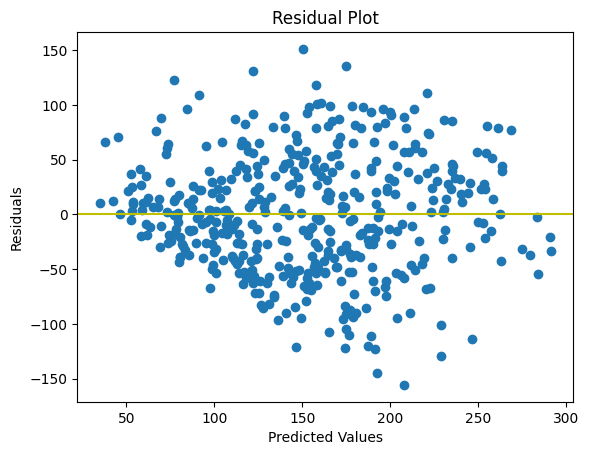

In [117]:

y_pred = model.predict(X_poly)

residuals = dt_y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='y', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


##### Here, the graph shows a random distribution around the zeroth line, indicating that the model with degree 1 is the best model making accurate predictions for the target variable.